In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')


In [3]:
print(customers.info())
print(products.info())
print(transactions.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

In [4]:
print(customers.head())
print(products.head())
print(transactions.head())


  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3       

In [5]:
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])


In [7]:
print(transactions.dtypes)


TransactionID              object
CustomerID                 object
ProductID                  object
TransactionDate    datetime64[ns]
Quantity                    int64
TotalValue                float64
Price                     float64
dtype: object


In [8]:
transactions['Price'] = pd.to_numeric(transactions['Price'], errors='coerce')


In [9]:
print(set(transactions['CustomerID']).issubset(set(customers['CustomerID'])))
print(set(transactions['ProductID']).issubset(set(products['ProductID'])))


True
True


In [10]:
print(customers.describe(include='all'))
print(products.describe(include='all'))
print(transactions.describe())


       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveW

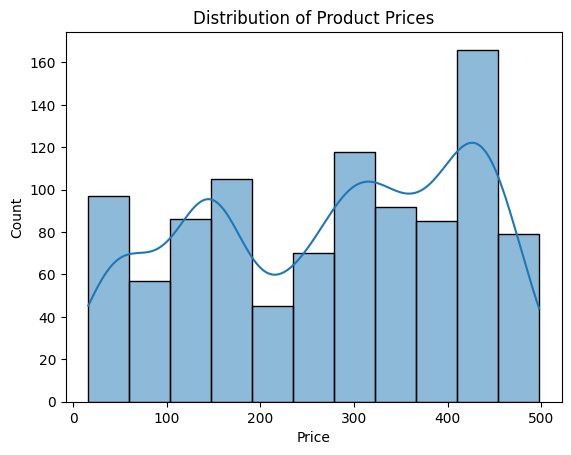

In [11]:
sns.histplot(transactions['Price'], kde=True)
plt.title('Distribution of Product Prices')
plt.show()


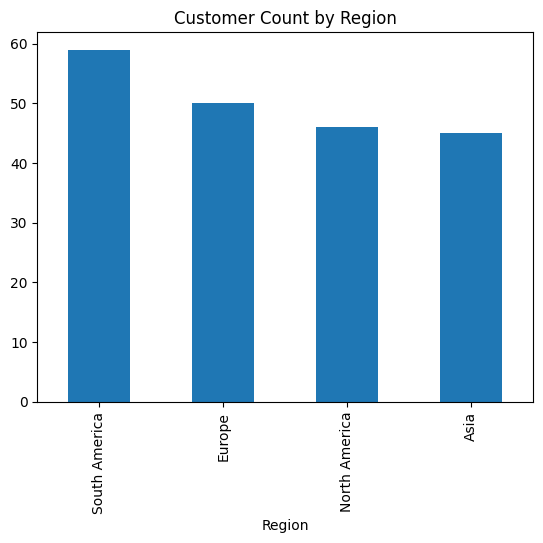

In [12]:
region_counts = customers['Region'].value_counts()
region_counts.plot(kind='bar', title='Customer Count by Region')
plt.show()


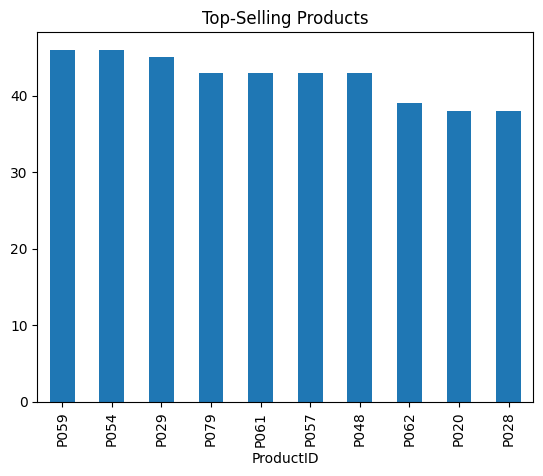

In [13]:
top_products = transactions.groupby('ProductID')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', title='Top-Selling Products')
plt.show()


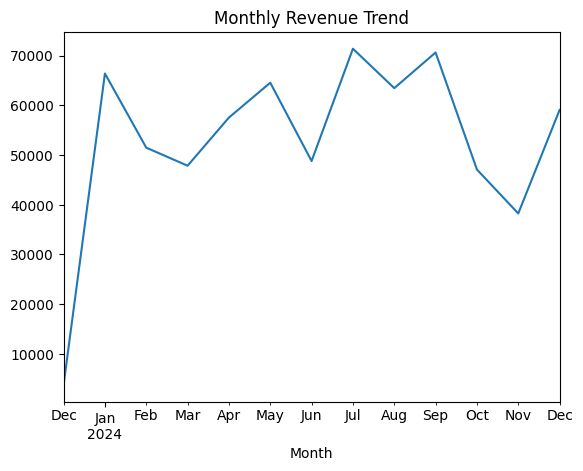

In [14]:
transactions['Month'] = transactions['TransactionDate'].dt.to_period('M')
monthly_revenue = transactions.groupby('Month')['TotalValue'].sum()
monthly_revenue.plot(kind='line', title='Monthly Revenue Trend')
plt.show()


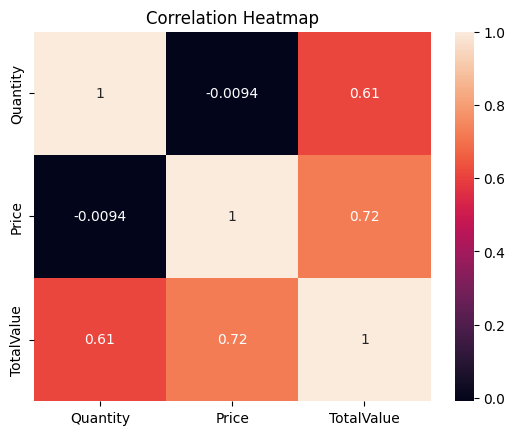

In [15]:
correlation = transactions[['Quantity', 'Price', 'TotalValue']].corr()
sns.heatmap(correlation, annot=True)
plt.title('Correlation Heatmap')
plt.show()


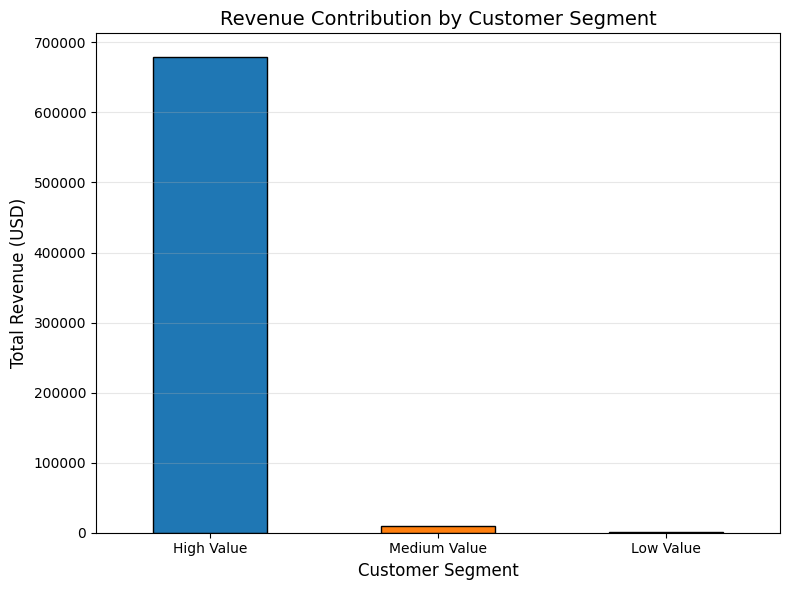

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
data = pd.merge(transactions, customers, on='CustomerID')
customer_revenue = data.groupby('CustomerID')['TotalValue'].sum().reset_index()
def segment_customer(revenue):
    if revenue >= 1000:
        return 'High Value'
    elif revenue >= 500:
        return 'Medium Value'
    else:
        return 'Low Value'
customer_revenue['Segment'] = customer_revenue['TotalValue'].apply(segment_customer)
segment_revenue = customer_revenue.groupby('Segment')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
segment_revenue.plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c'], edgecolor='black')
plt.title('Revenue Contribution by Customer Segment', fontsize=14)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Total Revenue (USD)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('customer_segmentation.png', dpi=300)
plt.show()